Importations pour tout le monde

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from time import time

def Iext(t):
    if t<150:
        return 0.59
    else : 
        return 0.6

$$
\left\{
    \begin{array}{ll}
        v'(t) =  v(t) - \frac{v(t)^3}{3} - w(t) + I_{ext}(t)\\
        \tau w'(t) = v(t) + a - bw(t)
    \end{array}
\right.
$$
____________________________
$ Y = \begin{pmatrix} v \\ w
\end{pmatrix}$ et $ Y'(t) = f(t, Y(t))$ avec :
$$f(t, Y(t)) = \begin{pmatrix} 
v(t) - \frac{v(t)^3}{3} - w(t) + I_{ext}(t)\\
\frac{1}{\tau}(v(t) + a - bw(t))
\end{pmatrix}
$$

**Méthode Euler explicite**

In [ ]:
def f_exp(Y, t, Iext):
    v,w = Y[0],Y[1]
    A = v - (v**3)/3 - w + Iext(t)
    B = 1/11*(v + 0.95 - 0.4*w)
    return [A,B]

def euler_exp(f, Y0, Iext, debut, fin, pas):
    nb_pas = int((fin-debut)//pas)
    T = [debut]
    Y = [Y0]
    for i in range(nb_pas)
        t = debut + pas*i
        lastY = Y[-1]
        pas_f = f(Y[-1], t, Iext)
        newY = [lastY[0] + pas * pas_f[0], lastY[1] + pas * pas_f[1]]
        T.append(t+pas)
        Y.append(newY)
    return T, Y
    
def affichage_exp(debut, fin, pas):
    T, Y = euler_exp(f_exp, [0,0], Iext, debut, fin, pas)
    Y = np.array(Y)
    v = (Y.T)[0]
    w = (Y.T)[1]
    plt.plot(T,v, 'b', label = "v")
    plt.plot(T,w,'r', label = "w")
    I = [Iext(t) for t in T]
    plt.plot(T,I, '--g', label = "Iext")
    plt.legend()
    plt.show()

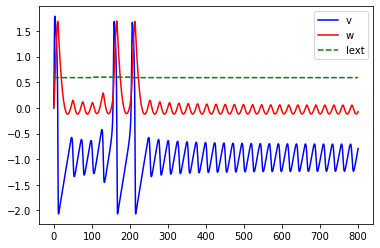

In [ ]:
affichage_exp(0,800, 0.01)

In [ ]:
def Iext2(t):
    if 100<t and t<200:
        return 0.6
    else : 
        return 0.59

def f_exp2(Y, t, Iext):
    v,w,v2 = Y[0],Y[1],Y[2]
    A = v - (v**3)/3 - w + Iext2(t)
    B = 1/11*(v + 0.95 - 0.4*w)
    C=v2-(v2**3)/3 - w + v
    return [A,B,C]

def euler_exp2(f, Y0, Iext, debut, fin, pas):
    
    nb_pas = int((fin-debut)//pas)
    T = [debut]
    Y = [Y0]
    for i in range(nb_pas):
        t = debut + pas*i
        lastY = Y[-1]
     
        pas_f = f(Y[-1], t, Iext)
        
        newY = [lastY[0] + pas * pas_f[0], lastY[1] + pas * pas_f[1],lastY[2] + pas * pas_f[2]]
        T.append(t+pas)
        Y.append(newY)
  
    return T, Y
    
def affichage_exp2(debut, fin, pas):
    t0=time()
    T, Y = euler_exp2(f_exp2, [0,0,0], Iext, debut, fin, pas)
    print("done in %0.3fs" % (time() - t0))
    Y = np.array(Y)
    v = (Y.T)[0]
    w = (Y.T)[1]
    v2=(Y.T)[2]
    plt.plot(T,v, label = "v neurone1")
    plt.plot(T,v2, label = "v neurone2")
    plt.plot(T,w, label = "w")
    
    I = [Iext(t) for t in T]
    #plt.plot(T,I, '--g', label = "Iext")
    plt.legend()
    plt.title('Méthode d\'Euler explicite')
    plt.show()


done in 0.060s


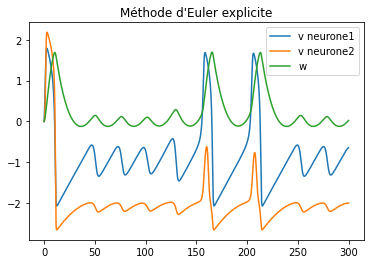

In [ ]:

affichage_exp2(0,300, 0.01)

Calculs autour de cette méthode :

**Méthode Euler implicite**

**Méthode des milieux**

done in 0.452s


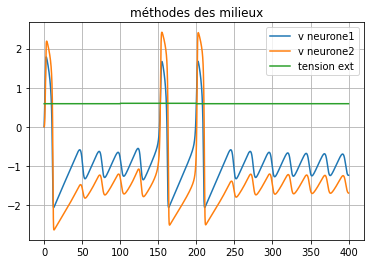

In [ ]:
tau = 11
a = 0.95
b = 0.4


def Iext(temps):
    #Bibi voit la carotte au bout du tiers du temps jusqu'aux deux tiers
    if temps < T/3:
        return 0.59
    if temps < 2*T/3:
        return 0.6
    else:
        return 0.59

def f (y,t):
  return (np.array([y[0]-((y[0]**3)/3)-y[1]+Iext(t),(y[0]+a-b*y[1])/tau]))


def meth_methode(T,n,y0):
  RungeKutta =np.zeros((n,2))
  RungeKutta[0]=y0
  h=T/n
  t=[0+k*h for k in range (0,n)]

  for i in range (n-1):
    RungeKutta[i+1]=RungeKutta[i] + h*f(RungeKutta[i] + (1/2)*h*f(RungeKutta[i], t[i]) , t[i] +(1/2)*h) 

  return t, RungeKutta 
##On trace la tension dans le neurone 1
t0=time()
t , RK1 =meth_methode(400,10000,np.array([0,0]))

n=10000
T = 300
RK2=np.zeros((n,2))
RK2[0]=np.array([0,0])
h=T/n
for i in range (n-1):
    val1=np.array([RK2[i][0]-((RK2[i][0]**3)/3)-RK2[i][1]+RK1[i][0] , (RK2[i][0]+a-b*RK2[i][1])/tau]) #f(RK2[0], ...) avec en entrée extérieur la sortie du neurone 1
    y = h*val1 + RK2[i]
    val2=(np.array([y[0]-((y[0]**3)/3)-y[1]+RK1[i][0],(y[0]+a-b*y[1])/tau]))
    
    RK2[i+1]= RK2[i] + h*(0.5*val1+0.5*val2)
print("done in %0.3fs" % (time() - t0))
    



plt.plot(t,RK1[:,0], label = 'v neurone1')
plt.plot(t, RK2[:,0], label = 'v neurone2')
plt.plot(t,[Iext(t[i]) for i in range(len(t))], label='tension ext')
plt.title('méthodes des milieux')
plt.grid()
plt.legend()




Calculs autour de cette méthode :

**Méthode de Runge Kutta**

*Runge-Kutta d'ordre 2*

done in 0.497s


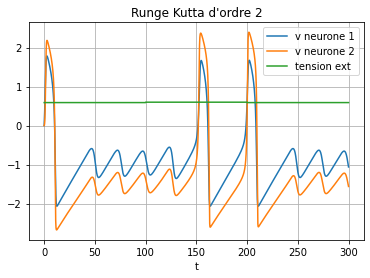

In [ ]:
tau = 11
a = 0.95
b = 0.4
T=300
def f (y,t):
  return(np.array([y[0]-((y[0]**3)/3)-y[1]+Iext(t),(y[0]+a-b*y[1])/tau]))

def RungeKutta2(T,n,y0):
  RK=np.zeros((n,2))
  RK[0]=y0
  h=T/n
  t=[0+k*h for k in range (0,n)]
  for i in range (n-1):
    val1=f(RK[i],t[i])
    val2=f(h*val1+RK[i],t[i+1])
    RK[i+1]=RK[i]+h*(0.5*val1+0.5*val2)  
  return t,RK 

def Iext(temps):
    #Bibi voit la carotte au bout du tiers du temps jusqu'aux deux tiers
    if temps < T/3:
        return 0.59
    if temps < 2*T/3:
        return 0.6
    else:
        return 0.59
t0=time()
t,Z=RungeKutta2(300,10000,np.array([0,0]))
n=10000
RK=np.zeros((n,2))
RK[0]=np.array([0,0])
h=T/n
for i in range (n-1):
    val1=(np.array([RK[i][0]-((RK[i][0]**3)/3)-RK[i][1]+Z[i][0],(RK[i][0]+a-b*RK[i][1])/tau]))
    y=h*val1+RK[i]
    val2=(np.array([y[0]-((y[0]**3)/3)-y[1]+Z[i][0],(y[0]+a-b*y[1])/tau]))
    RK[i+1]=RK[i]+h*(0.5*val1+0.5*val2)
print("done in %0.3fs" % (time() - t0))
plt.plot(t,Z[:,0], label = 'v neurone 1')
plt.plot(t,RK[:,0], label = 'v neurone 2')
plt.plot(t,[Iext(t[i]) for i in range(len(t))], label='tension ext')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title('Runge Kutta d\'ordre 2')
plt.legend()

Calculs autour de la méthode de Runge-Kutta 2 (méthode de Heun)
### Stabilité

Nous avons ici : 

$$ \alpha  = max_{1 \leq i \leq 2}(\sum_{j=1}^{i} |a_{i,j}|) = 1$$

f est k-lipschitzienne pour un certain k (suffisament grand).

D'après le théorème 4.4.2, cette méthode est stable avec constante de stabilité $S=e^{\Lambda T}$ où $\Lambda = k\sum_{j=1}^{2}|b_{j}| (1+(\alpha k h_{max})+...+(\alpha k h_{max})^{j-1})= k+\frac{\alpha hk^2}{2}$

### Ordre

Cette méthode est d'ordre 2. En effet :
$$\sum_{j=1}^{2} b_j c_j=\frac{1}{2}*0+\frac{1}{2}*1=\frac{1}{2}$$

### Consistance

Méthode à 1 pas : $y_{n+1} = y_{n} + h_{n}\phi (t_{n}, y_{n}, h_{n})$ où $\phi (t,y,h) = \frac{1}{2} f(t,y) + \frac{1}{2} f(t+h, y+ hf(t,y)) $

f est continue et on a :

$$\forall \, t \, \in [0, T], \forall \, y \in \mathbb{R}^m, \,  \phi (t,y,0) =  \frac{1}{2} f(t,y)+ \frac{1}{2} f(t,y)= f(t,y)$$

Ainsi d'après le théorème 4.3.7, la méthode est consistante.

La méthode étant donc stable et consistante, elle est convergente d'après le théorème 4.3.6.

Calculs autour de cette méthode : 

*Runge-Kutta avec q=4*

In [ ]:
a=0.95
b=0.4
tau=11
T=300
n=1000
h=T/n
t=[0+k*h for k in range(n+1)]

def RungeKutta4(T,n,y0,boolean):
    result = np.zeros((n+1, len(y0)))
    result[0]=y0
    for i in range(len(t)-1):
        pk1 = f(result[i], t[i], boolean, i)
        pk2 = f(result[i] + pk1 * h / 2, t[i] + h / 2, boolean, i)
        pk3 = f(result[i] + pk2 * h / 2, t[i] + h / 2, boolean, i)
        pk4 = f(result[i] + pk3 * h, t[i] + h, boolean, i)
        result[i+1] = result[i] + (h / 6) * (pk1 + 2*pk2 + 2*pk3 + pk4)
    return result

#La fonction f va gérer les 2 neurones selon le cas
def f (y, temps, boolean, i):
    if boolean == True :
        #neurone 1, entrée Iext
        return np.array([y[0]-((y[0]**3)/3)-y[1]+I(temps),(y[0]+a-b*y[1])/tau])
    else:
        #neurone 2, entrée = sortie du 1er neurone
        return np.array([y[0]-((y[0]**3)/3)-y[1]+resultat[i][0],(y[0]+a-b*y[1])/tau])
        

def I(temps):
    #Bibi voit la carotte au bout de la moitié du temps
    if temps < T/3:
        return 0.59
    if temps < 2*T/3:
        return 0.6
    else:
        return 0.59
    


done in 0.175s
(1001, 2)


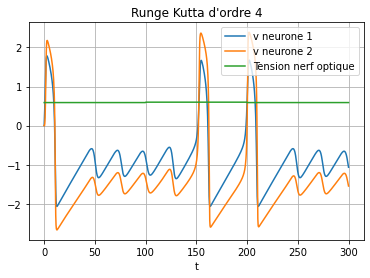

In [ ]:
t0=time()
resultat=RungeKutta4(T,n,np.array([0,0]), True) 
neurone2=RungeKutta4(T,n,np.array([0,0]), False)
print("done in %0.3fs" % (time() - t0))
plt.plot(t, resultat[:, 0], label = "v neurone 1")
plt.plot(t, neurone2[:, 0], label = "v neurone 2")
plt.plot(t, [I(k) for k in t], label = "Tension nerf optique")
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title('Runge Kutta d\'ordre 4')
plt.show()

Calculs autour de cette méthode :

### Stabilité

Nous avons ici : 

$$ \alpha  = max_{1 \leq i \leq 4}(\sum_{j=1}^{i} |a_{i,j}|) = 1$$

f est k-lipschitzienne pour un certain k (suffisament grand).

Puis d'après le théorème 4.4.2, cette *méthode est stable* avec constante de stabilité $S=e^{\Lambda T}$ où $\Lambda = k\sum_{j=1}^{4}|b_{j}| (1+(\alpha k h_{max})+...+(\alpha k h_{max})^{j-1})=k\sum_{j=1}^{4}|b_{j}| \frac{1- (k h_{max})^{j}}{1- k h_{max}} $

### Ordre

Cette méthode est d'ordre 4. En effet :

$$ La \, méthode \, est \, d'ordre \, 4 \iff \sum_{i=1}^{4} b_{j}c_{j} = \frac{1}{2} ; \sum_{i=1}^{4} b_{j}c_{j}^{2} = \frac{1}{3} ; \sum_{i,j=1}^{4} b_{i}a_{i,j}c_{j} = \frac{1}{6} ; \sum_{i=1}^{4} b_{j}c_{j}^{3} = \frac{1}{4} ; \sum_{i,j=1}^{4} b_{i}a_{i,j}c_{j}^{2} = \frac{1}{12} ; \sum_{i,j=1}^{4} b_{i}a_{i,j}c_{j}c_{i} = \frac{1}{8} \, et \, \sum_{i,j,k=1}^{4} b_{i}a_{i,j}a_{j,k}c_{k} = \frac{1}{12}$$

Or nous avons :

$$
\left\{
    \begin{array}{ll}
        a = \begin{pmatrix}
0 & 0 & 0 & 0 \\
\frac{1}{2} & 0 & 0 & 0 \\
0 & \frac{1}{2} & 0 & 0 \\
0 & 0 & 1 & 0
\end{pmatrix} \\
        b = (\frac{1}{6}, \frac{2}{6}, \frac{2}{6}, \frac{1}{6}) \\
        c = (0, \frac{1}{2}, \frac{1}{2}, 1)

    \end{array}
\right.
$$

Les égalités au-dessus sont clairement établies. Ainsi la méthode est *d'ordre 4*.

### Consistance

Nous avons une méthode à un pas : $y_{n+1} = y_{n} + h_{n}\phi (t_{n}, y_{n}, h_{n})$ où $\phi (t,y,h) = \frac{1}{6} f(t,y) + \frac{2}{6} f(t + \frac{1}{2} h, y+ \frac{1}{2}hf(t,y)) + \frac{2}{6} f(t + \frac{1}{2} h, y+ \frac{1}{2}hf(t + \frac{1}{2} h, y+ \frac{1}{2}hf(t,y))) + \frac{1}{6} f(t + h, y+ hf(t + \frac{1}{2} h, y+ \frac{1}{2}hf(t + \frac{1}{2} h, y+ \frac{1}{2}hf(t,y))))$

D'une part, f est continue.

D'autre part, nous avons :

$$\forall \, t \, \in [0, T], \forall \, y \in \mathbb{R}^m, \,  \phi (t,y,0) = \frac{1}{6} f(t,y) + \frac{2}{6} f(t, y) + \frac{2}{6} f(t, y) + \frac{1}{6} f(t, y) = f(t,y) $$

Ainsi d'après le théorème 4.3.7, *la méthode est consistante*.

La méthode étant donc stable et consistante, elle est convergente d'après le théorème 4.3.6.


In [ ]:
from scipy.integrate import solve_ivp

def f_exp_2(t, Y):
  
    v,w = Y[0],Y[1]
    if 100<t and t<200:
        I_ext=0.6
    else : 
        I_ext= 0.59
    A = v - (v**3)/3 - w + I_ext
    B = 1/11*(v + 0.95 - 0.4*w)
  
    return np.asarray([A,B])

sol = solve_ivp(f_exp_2,t_span= [0, 300],y0= [0,0])




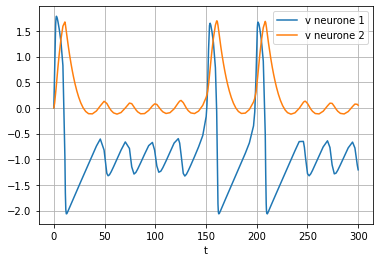

In [ ]:
t=sol.t
v=sol.y[0]
w=sol.y[1]

plt.plot(t, v, label = "v neurone 1")
plt.plot(t, w, label = "w ")

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()


done in 0.064s


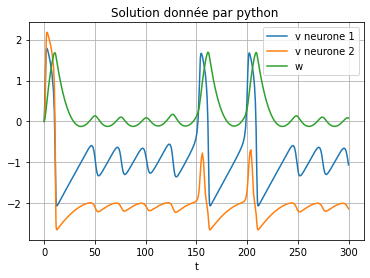

In [ ]:
def f_exp_3(t, Y):
  
    v1,w,v2 = Y[0],Y[1],Y[2]
    if 100<t and t<200:
        I_ext=0.6
    else : 
        I_ext= 0.59
    A = v1 - (v1**3)/3 - w + I_ext
    B = 1/11*(v1 + 0.95 - 0.4*w)
    C=v2-(v2**3)/3 - w + v1
  
    return np.asarray([A,B,C])
t0=time()
sol2 = solve_ivp(f_exp_3,t_span= [0, 300],y0= [0,0,0])
print("done in %0.3fs" % (time() - t0))
t=sol2.t
v=sol2.y[0]
w=sol2.y[1]
V2=sol2.y[2]

plt.plot(t, v, label = "v neurone 1")
plt.plot(t, V2, label = "v neurone 2")
plt.plot(t, w, label = "w ")

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.title('Solution donnée par python ')
plt.show()

